In [1]:
import pandas as pd

data2 = {
    'Date': pd.date_range(start='2023-01-01', periods=10),
    'Product_A': [120, 150, 130, 110, 140, 160, 135, 125, 145, 155],
    'Product_B': [90, 110, 100, 80, 95, 105, 98, 88, 102, 112],
    'Product_C': [75, 80, 85, 70, 88, 92, 78, 82, 87, 90]
}

df2 = pd.DataFrame(data2)

In [7]:
df2

,Date,Product_A,Product_B,Product_C,Total_Sales
0,2023-01-01,120,90,75,285
1,2023-01-02,150,110,80,340
2,2023-01-03,130,100,85,315
3,2023-01-04,110,80,70,260
4,2023-01-05,140,95,88,323
5,2023-01-06,160,105,92,357
6,2023-01-07,135,98,78,311
7,2023-01-08,125,88,82,295
8,2023-01-09,145,102,87,334
9,2023-01-10,155,112,90,357


In [ ]:
total_sales = pd.DataFrame()
total_sales['total'] = df2[['Product_A', 'Product_B', 'Product_C']].sum()
total_sales


,total
Product_A,1370
Product_B,980
Product_C,827


In [ ]:
df2['Total_Sales'] = df2[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)
highest_sales_date = df2.loc[df2['Total_Sales'].idxmax(), 'Date']
highest_sales_date

Timestamp('2023-01-06 00:00:00')

In [36]:
df2['Product_A_pct_change'] = round(df2['Product_A'].pct_change() * 100,2).fillna(0)
df2['Product_B_pct_change'] = round(df2['Product_B'].pct_change() * 100,2).fillna(0)
df2['Product_C_pct_change'] = round(df2['Product_C'].pct_change() * 100,2).fillna(0)
df2[['Date','Product_A','Product_A_pct_change', 'Product_B','Product_B_pct_change', 'Product_C','Product_C_pct_change']]



,Date,Product_A,Product_A_pct_change,Product_B,Product_B_pct_change,Product_C,Product_C_pct_change
0,2023-01-01,120,0.00,90,0.00,75,0.00
1,2023-01-02,150,25.00,110,22.22,80,6.67
2,2023-01-03,130,-13.33,100,-9.09,85,6.25
3,2023-01-04,110,-15.38,80,-20.00,70,-17.65
4,2023-01-05,140,27.27,95,18.75,88,25.71
5,2023-01-06,160,14.29,105,10.53,92,4.55
6,2023-01-07,135,-15.62,98,-6.67,78,-15.22
7,2023-01-08,125,-7.41,88,-10.20,82,5.13
8,2023-01-09,145,16.00,102,15.91,87,6.10
9,2023-01-10,155,6.90,112,9.80,90,3.45


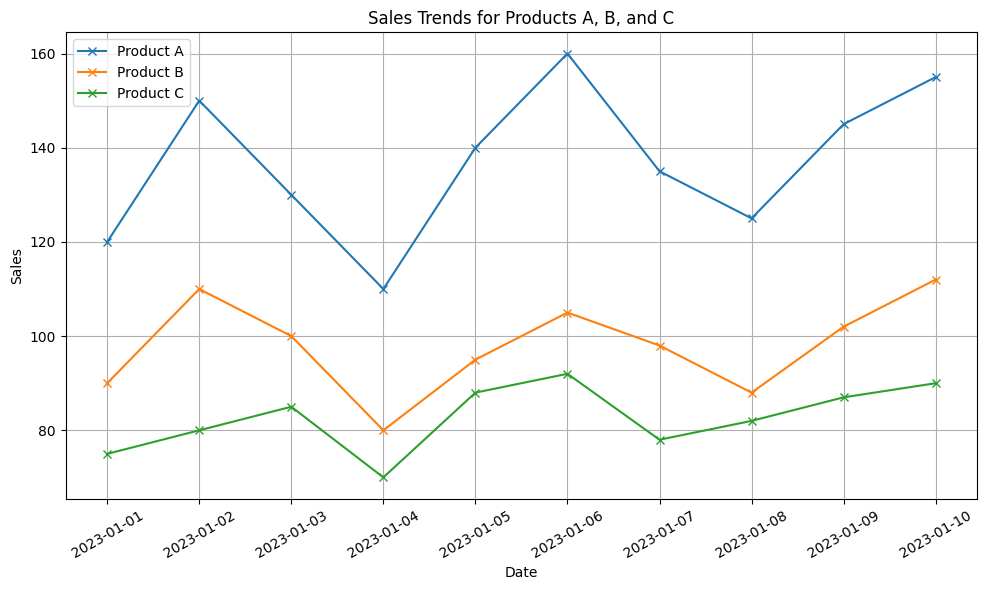

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['Product_A'], label='Product A', marker='o')
plt.plot(df2['Date'], df2['Product_B'], label='Product B', marker='o')
plt.plot(df2['Date'], df2['Product_C'], label='Product C', marker='o')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends for Products A, B, and C')
plt.legend()
plt.grid(True)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

data3 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Department': ['HR', 'IT', 'Marketing', 'IT', 'Finance', 'HR', 'Marketing', 'IT', 'Finance', 'Marketing'],
    'Salary': [60000, 75000, 65000, 80000, 70000, 72000, 68000, 78000, 69000, 76000],
    'Experience (Years)': [3, 5, 2, 8, 4, 6, 3, 7, 2, 5]
}

df3 = pd.DataFrame(data3)

In [24]:
average_salary_by_department = pd.DataFrame()
average_salary_by_department['Average salary'] = df3.groupby('Department')['Salary'].mean()
average_salary_by_department


,Average salary
Department,
Finance,69500.000000
HR,66000.000000
IT,77666.666667
Marketing,69666.666667


In [33]:
most_experience_employee = df3.loc[df3['Experience (Years)'].idxmax()]
most_experience_employee


Employee_ID             104
Name                  David
Department               IT
Salary                80000
Experience (Years)        8
Name: 3, dtype: object

In [ ]:
min_salary = df3['Salary'].min()
df3['Salary Increase'] = ((df3['Salary'] - min_salary) / min_salary) * 100
df3

,Employee_ID,Name,Department,Salary,Experience (Years),Salary Increase
0,101,Alice,HR,60000,3,0.000000
1,102,Bob,IT,75000,5,25.000000
2,103,Charlie,Marketing,65000,2,8.333333
3,104,David,IT,80000,8,33.333333
4,105,Emma,Finance,70000,4,16.666667
5,106,Frank,HR,72000,6,20.000000
6,107,Grace,Marketing,68000,3,13.333333
7,108,Hank,IT,78000,7,30.000000
8,109,Ivy,Finance,69000,2,15.000000
9,110,Jack,Marketing,76000,5,26.666667


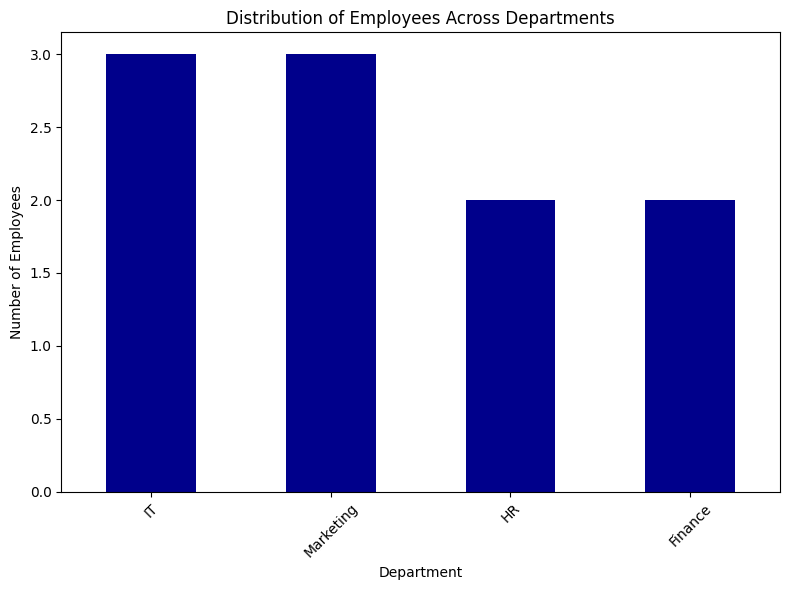

In [49]:
department_counts = df3['Department'].value_counts()

plt.figure(figsize=(8, 6))
department_counts.plot(kind='bar', color='darkblue')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees Across Departments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd

data4 = {
    'Order_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Customer_ID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Product': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'A'],
    'Quantity': [2, 3, 1, 4, 2, 3, 2, 5, 1, 3],
    'Total_Price': [120, 180, 60, 240, 160, 270, 140, 300, 90, 180]
}

df4 = pd.DataFrame(data4)

In [56]:
total_revenue = df4['Total_Price'].sum()
print(total_revenue)



1740


In [ ]:
most_ordered_product = df4['Product'].mode()[0]
print(most_ordered_product)


A


In [59]:
average_quantity = df4['Quantity'].mean()
print(average_quantity)


2.6


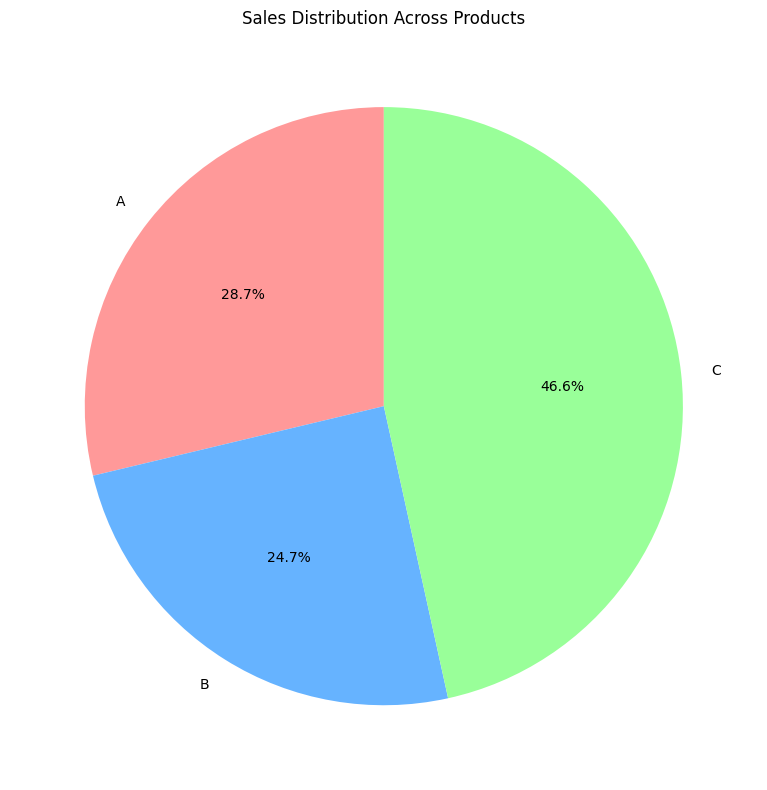

In [61]:
product_sales = df4.groupby('Product')['Total_Price'].sum()

plt.figure(figsize=(8, 8))
product_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Distribution Across Products')
plt.ylabel('')
plt.tight_layout()
plt.show()
